In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy import stats
from vnstock import *

In [111]:
us = pd.read_csv("us_stock.csv", index_col="Date", parse_dates=True)
vn = pd.read_csv("vn_price.csv", index_col="TradingDate", parse_dates=True)

# Mã cổ phiếu

In [112]:
vn.columns

Index(['AAA', 'AAM', 'AAT', 'ABR', 'ABS', 'ABT', 'ACB', 'ACC', 'ACG', 'ACL',
       ...
       'VPS', 'VRC', 'VRE', 'VSC', 'VSH', 'VSI', 'VTB', 'VTO', 'YBM', 'YEG'],
      dtype='object', length=406)

# Xem tổng quan

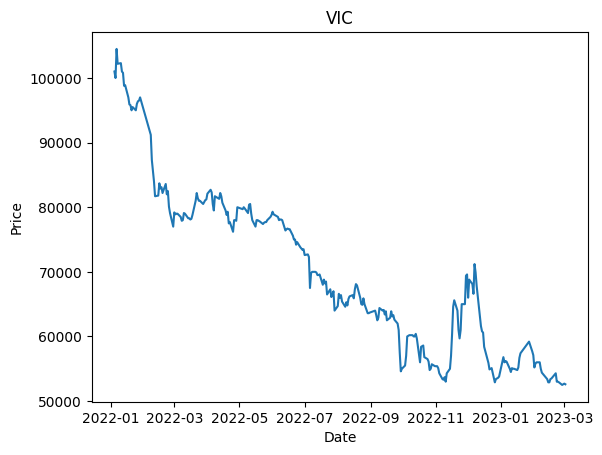

In [113]:
ticker = "VIC"
vn_df = vn[ticker][vn.index.year >=2022]
so_lan = len(vn_df)
plt.plot(vn_df)
plt.title(f"{ticker}")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

# Ước lượng $\mu, \sigma$

In [114]:
mu = vn[ticker].pct_change().mean()
sigma = vn[ticker].pct_change().std()
print(f"mu là {mu}")
print(f"sigma là {sigma}")

mu là 0.0005806102313072562
sigma là 0.017759817771055453


# Mô phỏng

$\frac{dS_t}{S_t}=\mu dt+\sigma dB_t$

In [115]:
sigma_dBt = sigma*np.random.randn(so_lan)
mu_dt = mu*np.ones(so_lan)

Mô phỏng $S(t)=S(0)e^{\sigma B_t+(\mu-\frac12 \sigma^2)t}$

In [116]:
sigma_Bt = sigma*np.random.randn(so_lan)
mu_t = (mu-0.5*sigma**2)*np.ones(so_lan)
sti = np.cumprod(np.exp(sigma_Bt+mu_t))

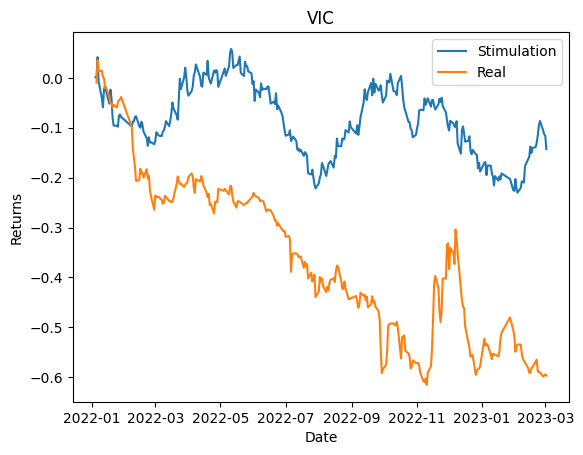

In [117]:
plt.plot(vn_df.index,sti-1, label="Stimulation")
plt.plot(np.cumsum(vn_df.pct_change()),label="Real")
plt.legend()
plt.title(f"{ticker}")
plt.ylabel("Returns")
plt.xlabel("Date")
plt.show()